In [13]:
import sys
sys.path.append('/home/replica/Desktop/ProjectManager/Code/Binom/results/') 
# sys.path.append('/home/replica/Desktop/ProjectManager/Code/Binom/dataGeneration/')



In [14]:

%load_ext autoreload
%autoreload 2

from dataGeneration.data_generation import binom_pmf, poisson_pmf, moivre_pmf
import matplotlib.pyplot as plt
from searchDot import plot_approximation_errors
import seaborn as sns
import numpy as np
import catppuccin
import matplotlib as mpl
from scipy.stats import binom, poisson
import pandas as pd

mpl.style.use(catppuccin.PALETTE.mocha.identifier)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


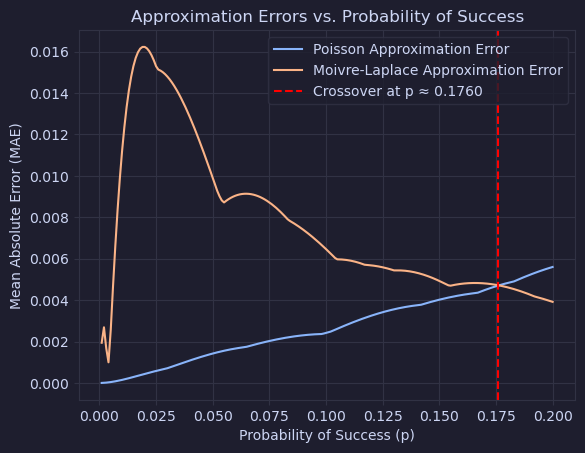

In [15]:

p_values, error_moivre_array, error_poisson_array, crossover_p = ((
    plot_approximation_errors(n = 20, k_values = np.arange(0, 20)))
)

sns.lineplot(x=p_values, y=error_poisson_array, label="Poisson Approximation Error")
sns.lineplot(
    x=p_values, y=error_moivre_array, label="Moivre-Laplace Approximation Error"
)

if crossover_p is not None:
    plt.axvline(
        x=crossover_p,
        color="r",
        linestyle="--",
        label=f"Crossover at p ≈ {crossover_p:.4f}",
    )
plt.xlabel("Probability of Success (p)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Approximation Errors vs. Probability of Success")
plt.legend()
plt.grid(True)

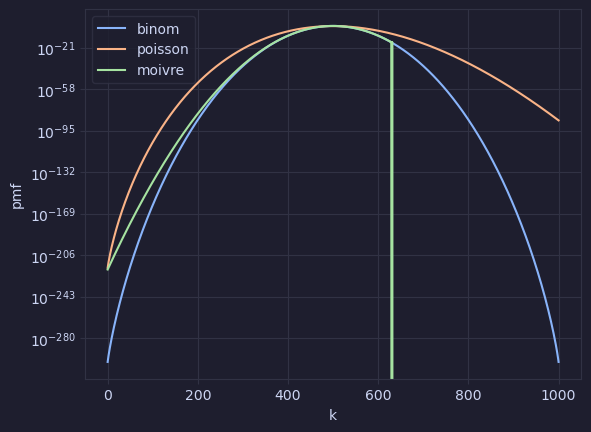

In [31]:
n = 1000
k_arrange = np.arange(0, n + 1)
# k_arrange = n // 2
p = 0.5

y = binom.pmf(k_arrange, n,  p)
sns.lineplot(x = k_arrange, y=y, label = "binom")

y = poisson.pmf(k_arrange, n * p)
sns.lineplot(x = k_arrange, y=y, label = "poisson")

y = moivre_pmf(k_arrange, n, p )
sns.lineplot(x = k_arrange, y=y, label = "moivre")

plt.yscale("log")
# plt.xscale("log")

plt.xlabel("k")
plt.ylabel("pmf")
plt.legend()

plt.grid()




In [32]:

# n = 1000

k_arrange = np.arange(0, n + 1)
# k_arrange = n // 2
# p = 0.9

df = pd.DataFrame()
y = binom.pmf(k_arrange, n,  p)
df["binom"] = y

y = poisson.pmf(k_arrange, n * p)
df["poisson"] = y

y = moivre_pmf(k_arrange, n, p )
df["moivre_pmf"] = y

df[df["moivre_pmf"] != 0].tail(5)
# df[df["moivre_pmf"] != 0].head(5)

,binom,poisson,moivre_pmf
626,2.996134e-16,6.658247e-09,3.330669e-16
627,1.787168e-16,5.309607e-09,3.330669e-16
628,1.061487e-16,4.227394e-09,1.110223e-16
629,6.277790e-17,3.360409e-09,1.110223e-16
631,2.167766e-17,2.113305e-09,1.110223e-16


In [10]:
n = 100

k_arrange = np.arange(0, n + 1)
# k_arrange = n // 2
p = 0.5

df = pd.DataFrame()
y = binom.pmf(k_arrange, n,  p)
df["binom"] = y

y = poisson.pmf(k_arrange, n * p)
df["poisson"] = y

y = moivre_pmf(k_arrange, n, p )
df["moivre_pmf"] = y

df[df["moivre_pmf"] != 0].tail(5)

,binom,poisson,moivre_pmf
87,5.609229e-15,5.913515e-07,1.120215e-13
88,8.286361e-16,3.359952e-07,2.509104e-14
89,1.117262e-16,1.887613e-07,5.329071e-15
90,1.365543e-17,1.048674e-07,1.221245e-15
91,1.500596e-18,5.761945e-08,2.220446e-16
